## Block 2 Homework
## Huram-ABi Nzia Yotchoum

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score as score
from sklearn.metrics import confusion_matrix as cmatrix
from sklearn import tree
from sklearn import metrics

from PIL import Image


### Documentation

    https://github.com/ageron/handson-ml2/blob/master/07_ensemble_learning_and_random_forests.ipynb
    

### Lesson 24

#### ISLR Chapter 8 Q 1

In [66]:
Image.open("Q1_a.png").show()
Image.open("Q1b.png").show()

#### ISLR Chapter 8 Q 3

#### ISLR Chapter 8 Q 4

In [3]:

# 4a.
#                 X_1 >= 1 
#                 ________
#                |        |
#                |        |
#                |        | X_2 >= 1
#                5     _______
#                     |       |
#                     |       |
#                     |       | X_1 < 0
#                    15    _______
#                         |       |
#                         |       |
#                         |       | X_2 < 0
#                         3    _______
#                             |       |
#                             |       |
#                             |       |
#                             10      0


# 4b.

#                   
#                  _____________________________
#                 |                             |
#                 |            2.49             |
#               2 |-----------------------------|
#                 | -1.06 |      0.21           |
#       X2        |       |                     |
#               1 |-----------------------------|
#                 |             |               |
#                 |             |               |
#                 |  -1.80      |     0.63      |
#                 |             |               |
#                 |_____________|_______________|
#                         0     1
#
#                                X1

### Lesson 25

#### ISLR Chapter 8 Q 5

In [4]:
"""
Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches
"""
p_x = np.array([0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75])

# majority vote: the overall prediction is the most commonly occurring majority vote class among the B predictions

p_red = p_x[p_x >= 0.5].mean()
p_green = 1 - p_red

print("majority vote method:")
print("Classification of red ", p_red)
print("Classification of green ", p_green)

# average method

p_red = np.mean(p_x)
p_green = 1 - p_red

print("average method:")
print("Classification of red ", p_red)
print("Classification of green ", p_green)



majority vote method:
Classification of red  0.6416666666666666
Classification of green  0.3583333333333334
average method:
Classification of red  0.45
Classification of green  0.55


#### ISLR Chapter 8 Q 6

In [5]:
'''
Provide a detailed explanation of the algorithm that is used to fit a
regression tree. 

The algorithm is as follows: 

    1. Select the best split point (X, y) for the current node. This is
    done by maximizing the information gain.
    2. For each possible split point, compute the average of the y
    values for the left and right nodes.
    3. Compute the variance of the y values for the left and right nodes.
    4. Compute the information gain for each possible split point.
    5. Choose the split point with the largest information gain.
    6. Split the data set into two subsets.
    7. Recursively build the regression tree for each subset.
 




'''

'\nProvide a detailed explanation of the algorithm that is used to fit a\nregression tree. \n\nThe algorithm is as follows: \n\n    1. Select the best split point (X, y) for the current node. This is\n    done by maximizing the information gain.\n    2. For each possible split point, compute the average of the y\n    values for the left and right nodes.\n    3. Compute the variance of the y values for the left and right nodes.\n    4. Compute the information gain for each possible split point.\n    5. Choose the split point with the largest information gain.\n    6. Split the data set into two subsets.\n    7. Recursively build the regression tree for each subset.\n \n\n\n\n\n'

### Lesson 26

#### ISLR Chapter 8 Q 7 (bagging)

In [6]:
Boston_df = pd.read_csv('Boston.csv')
Boston_df = Boston_df.drop(['Unnamed: 0'], axis=1)
Boston_df.info()
Boston_df.describe()
Boston_df['rad'].unique()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  lstat    506 non-null    float64
 12  medv     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


array([ 1,  2,  3,  5,  4,  8,  6,  7, 24], dtype=int64)

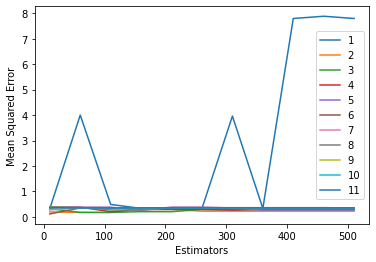

In [8]:
from sklearn import metrics


X_train, X_test, y_train, y_test = tts(Boston_df.drop('rad', axis=1), Boston_df['rad'], test_size=0.2, random_state=0)


estim = np.arange(10, 560, 50)
mtry = np.arange(1, len(Boston_df.drop('rad', axis=1).columns), 1)



for feat in mtry:
    
    error = []

    for estimator in estim:
        bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=estimator, bootstrap=True, n_jobs=-1, max_features=feat, random_state=0)

        bag_clf.fit(X_train, y_train)

        y_pred = bag_clf.predict(X_test)

        error.append(metrics.mean_squared_error(y_test, y_pred))

    plt.plot(estim, error)
    plt.xlabel('Estimators')
    plt.ylabel('Mean Squared Error')
    plt.legend(mtry)
plt.show()

    

### Lesson 27

#### ISLR Chapter 8 Q 7 (Random Forest)

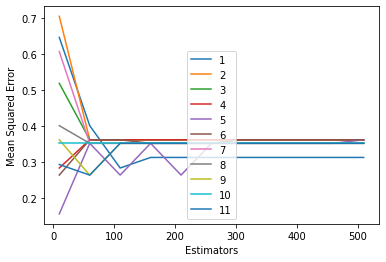

In [9]:
X_train, X_test, y_train, y_test = tts(Boston_df.drop('rad', axis=1), Boston_df['rad'], test_size=0.2, random_state=0)


estim = np.arange(10, 560, 50)
mtry = np.arange(1, len(Boston_df.drop('rad', axis=1).columns), 1)

for feat in mtry:
    error = []
    for estimator in estim:
        
        rand_for = RandomForestClassifier(n_estimators=estimator, random_state=0, max_features=feat)

        rand_for.fit(X_train, y_train)

        y_pred = rand_for.predict(X_test)

        error.append(metrics.mean_squared_error(y_test, y_pred))
    
    plt.plot(estim, error)
    plt.xlabel('Estimators')
    plt.ylabel('Mean Squared Error')
    plt.legend(mtry)
plt.show()


### Lesson 28

#### Geron Chapter 7 Q 1

In [11]:
"""
If you have trained five different models on the exact same training data, 
and they all achieve 95% precision, is there any chance that you 
can combine these models to get better results? If so, how? If not, why?

Yes there is a chance, because you can combine all the models into one and create an ensemble model.

"""

'\nIf you have trained five different models on the exact same training data, \nand they all achieve 95% precision, is there any chance that you \ncan combine these models to get better results? If so, how? If not, why?\n\nYes there is a chance, because you can combine all the models into one and create an ensemble model.\n\n'

#### Geron Chapter 7 Q 4

In [ ]:
"""
What is the benefit of out-of-bag evaluation?

The benefit of out-of-bag evaluation is that it allows you to estimate the generalization error of your model.
It is a measure of how well the model generalizes to new data. It is not a measure of how well the model is able to
predict new data. 

"""

#### Geron Chapter 7 Q 9

In [26]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

X_train_val, X_test, y_train_val, y_test = tts(mnist.data, mnist.target, test_size=10000, random_state=42)
X_train, X_val, y_train, y_val = tts(X_train_val, y_train_val, test_size=10000, random_state=42)

In [23]:
randfor = RandomForestClassifier(n_estimators=100, random_state=42)
Xtres = ExtraTreesClassifier(n_estimators=100, random_state=42)
svm = LinearSVC(max_iter=100, tol=20, random_state=42)
mlp= MLPClassifier(random_state=42)

In [28]:
rand_for.fit(X_train, y_train)
Xtres.fit(X_train, y_train)
svm.fit(X_train, y_train)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=42)

In [29]:
print("Random Forest Classifier ACC: ", rand_for.score(X_val, y_val))
print("Extra Trees Classifier ACC: ", Xtres.score(X_val, y_val))
print("SVM ACC: ", svm.score(X_val, y_val))
print("MLP ACC: ", mlp.score(X_val, y_val))

Random Forest Classifier ACC:  0.9686
Extra Trees Classifier ACC:  0.9715
SVM ACC:  0.859
MLP ACC:  0.9603


In [31]:
from sklearn.ensemble import VotingClassifier

vote = VotingClassifier(estimators=[('rand_for', rand_for), ('Xtres', Xtres), ('mlp', mlp)] , voting='hard')

vote.fit(X_train, y_train)

VotingClassifier(estimators=[('rand_for',
                              RandomForestClassifier(max_features=11,
                                                     n_estimators=510,
                                                     random_state=0)),
                             ('Xtres', ExtraTreesClassifier(random_state=42)),
                             ('mlp', MLPClassifier(random_state=42))])

In [32]:
print("Voting Classifier ACC: ", vote.score(X_val, y_val))

Voting Classifier ACC:  0.9738


In [33]:
### Blender

X_val_predictions = np.empty((len(X_val), 4), dtype=np.float32)

X_val_predictions[:, 0] = rand_for.predict(X_val)
X_val_predictions[:, 1] = Xtres.predict(X_val)
X_val_predictions[:, 2] = svm.predict(X_val)
X_val_predictions[:, 3] = mlp.predict(X_val)


rand_for_blender = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True)
rand_for_blender.fit(X_val_predictions, y_val)





RandomForestClassifier(oob_score=True, random_state=42)

In [34]:
rand_for_blender.oob_score_

0.9708

In [35]:
X_test_predictions = np.empty((len(X_test), 4), dtype=np.float32)

X_test_predictions[:, 0] = rand_for.predict(X_test)
X_test_predictions[:, 1] = Xtres.predict(X_test)
X_test_predictions[:, 2] = svm.predict(X_test)
X_test_predictions[:, 3] = mlp.predict(X_test)

y_pred = rand_for_blender.predict(X_test_predictions)

print("Blender Accuracy", metrics.accuracy_score(y_test, y_pred))



Blender Accuracy 0.9676


### Lesson 29

#### ISLR Chapter 10 Q 1

In [67]:
Image.open("D10_1.png").show()

### Lesson 30

In [62]:
from tensorflow.keras.datasets import mnist, fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D
from tensorflow.keras.models import Sequential




#### Dietel Chapter 16 Q 1

In [68]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [69]:
cnn1 = Sequential()
cnn1.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn1.add(MaxPooling2D(pool_size=(2, 2)))
cnn1.add(Flatten())
cnn1.add(Dense(units=10, activation='softmax'))
cnn1.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
cnn1.fit(X_train, y_train, epochs=5, batch_size=64,
              validation_split=0.1)

Epoch 1/5
844/844 [==============================] - 26s 31ms/step - loss: 0.4884 - accuracy: 0.8262 - val_loss: 0.3486 - val_accuracy: 0.8742
Epoch 2/5
844/844 [==============================] - 26s 31ms/step - loss: 0.3272 - accuracy: 0.8840 - val_loss: 0.3183 - val_accuracy: 0.8822
Epoch 3/5
844/844 [==============================] - 26s 30ms/step - loss: 0.2845 - accuracy: 0.8979 - val_loss: 0.2856 - val_accuracy: 0.8977
Epoch 4/5
844/844 [==============================] - 27s 32ms/step - loss: 0.2553 - accuracy: 0.9077 - val_loss: 0.2847 - val_accuracy: 0.8947
Epoch 5/5
844/844 [==============================] - 28s 33ms/step - loss: 0.2300 - accuracy: 0.9160 - val_loss: 0.2669 - val_accuracy: 0.9022


In [70]:
loss, accuracy = cnn1.evaluate(X_test, y_test)

print("CNN Accuracy: ", accuracy)
print("CNN Loss: ", loss)

313/313 [==============================] - 2s 7ms/step - loss: 0.2831 - accuracy: 0.8991
CNN Accuracy:  0.8991000056266785
CNN Loss:  0.28309690952301025


In [71]:
predictions = cnn1.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')

0: 0.0000271801%
1: 0.0000001152%
2: 0.0000033489%
3: 0.0000149663%
4: 0.0000028003%
5: 0.1838986180%
6: 0.0000185575%
7: 0.3683692310%
8: 0.0033274275%
9: 99.4443356991%


#### Dietel Chapter 16 Q 2

In [72]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
X_train = X_train.astype('float32') / 255

X_test = X_test.astype('float32') / 255

In [73]:
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3, 5), activation='relu', input_shape=(28, 28, 1)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(filters=128, kernel_size=(3, 5), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Flatten())
cnn.add(Dense(units=10, activation='softmax'))
cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=5, batch_size=64,
              validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 27s 31ms/step - loss: 0.1620 - accuracy: 0.9524 - val_loss: 0.0465 - val_accuracy: 0.9853
Epoch 2/5
844/844 [==============================] - 27s 32ms/step - loss: 0.0474 - accuracy: 0.9859 - val_loss: 0.0375 - val_accuracy: 0.9900
Epoch 3/5
844/844 [==============================] - 27s 32ms/step - loss: 0.0341 - accuracy: 0.9889 - val_loss: 0.0297 - val_accuracy: 0.9920
Epoch 4/5
844/844 [==============================] - 27s 32ms/step - loss: 0.0243 - accuracy: 0.9925 - val_loss: 0.0306 - val_accuracy: 0.9917
Epoch 5/5
844/844 [==============================] - 27s 32ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0346 - val_accuracy: 0.9915


In [60]:
loss, accuracy = cnn.evaluate(X_test, y_test)

print("CNN Accuracy: ", accuracy)
print("CNN Loss: ", loss)

313/313 [==============================] - 2s 6ms/step - loss: 0.0379 - accuracy: 0.9882
CNN Accuracy:  0.9882000088691711
CNN Loss:  0.0379319004714489


In [61]:
predictions = cnn.predict(X_test)
for index, probability in enumerate(predictions[0]):
    print(f'{index}: {probability:.10%}')


0: 0.0000000005%
1: 0.0000000113%
2: 0.0000347892%
3: 0.0000299082%
4: 0.0000000001%
5: 0.0000000078%
6: 0.0000000000%
7: 99.9999284744%
8: 0.0000000459%
9: 0.0000026494%
